# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

import ast

import warnings
warnings.filterwarnings("ignore")

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as ms
import sklearn.preprocessing as preprocess
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


from langdetect import detect
import pyarabic.araby as araby
# !pip install -U gensim
# !pip install -U seaborn

import gensim
import re


import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit

from scipy.stats import pearsonr
from matplotlib import pyplot

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB



# Rename Labels into -1, 0, and 1

In [2]:
dataset_folder_path="/home/youssef/AUC/Spring22/CSCE493002 - Machine Learning/project/datasets"

In [3]:
df = pd.read_csv(dataset_folder_path+'/ar_reviews_100k.csv')
df["label"]=df["label"].str.replace("Positive","1")
df["label"]=df["label"].str.replace("Mixed","0")
df["label"]=df["label"].str.replace("Negative","-1")
df

label                                               text
0         1  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1         1  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2         1  هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3         1  خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4         1  ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...     ...                                                ...
99994    -1  معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995    -1  لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996    -1  كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997    -1  مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...
99998    -1  لن ارجع إليه مرة اخرى . قربه من البحر. المكان ...

[99999 rows x 2 columns]

In [4]:
df= pd.read_csv(dataset_folder_path+"/freqEncoded.csv")
df.drop(columns=["text","stemmed_text","normalized","clean_text"],axis=1,inplace=True)
df

label                                               freq
0          1  {'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':...
1          1  {'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':...
2          1  {'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'...
3          1  {'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':...
4          1  {'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':...
...      ...                                                ...
99994     -1  {'عرفش': 1, 'ليه': 1, 'كنت': 1, 'كمل': 1, 'وهي...
99995     -1  {'لا': 3, 'سحق': 1, 'يكون': 1, 'كنق': 1, 'لنه'...
99996     -1  {'ضعف': 1, 'جدا': 1, 'ولم': 1, 'متع': 1, 'به':...
99997     -1  {'ملة': 1, 'جدا': 1, 'حمد': 1, 'حسن': 1, 'علو'...
99998     -1  {'لن': 1, 'رجع': 1, 'اله': 1, 'مرة': 1, 'خرى':...

[99999 rows x 2 columns]

# TF-IDF

In [12]:
def get_freq(words):
  freq=dict()
  for word in words:
      if word in freq:
        freq[word]+=1
      else:
        freq[word]=1
  return freq

In [10]:
df["freq"]=df["text"].apply(get_freq)
df

label                                               text  \
0         1  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...   
1         1  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...   
2         1  هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...   
3         1  خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...   
4         1  ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...   
...     ...                                                ...   
99994    -1  معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...   
99995    -1  لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...   
99996    -1  كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...   
99997    -1  مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...   
99998    -1  لن ارجع إليه مرة اخرى . قربه من البحر. المكان ...   

                                                    freq  
0      {'م': 6, 'ت': 2, 'ا': 10, 'ز': 2, ' ': 8, 'ن':...  
1      {'أ': 4, 'ح': 10, 'د': 7, ' ': 52, 'س': 6, 'ب'...  
2      {'ه': 4, 'ا': 27, 'د': 4, 'ف': 5, 'ة': 10, ' '...  
3      {'خ': 8, 'ل': 36, 'ص': 7, 'ن': 28, 'ا': 68, ' ...  
4      {'ي': 7, 'ا': 9, 'س': 2, 'ت': 4, ' ': 14, 'ج':...  
...                                                  ...  
99994  {'م': 10, 'ع': 5, 'ر': 4, 'ف': 3, 'ش': 3, ' ':...  
99995  {'ل': 6, 'ا': 10, ' ': 19, 'ي': 9, 'س': 3, 'ت'...  
99996  {'ك': 3, 'ت': 3, 'ا': 4, 'ب': 3, ' ': 15, 'ض':...  
99997  {'م': 7, 'ل': 16, 'ة': 3, ' ': 29, 'ج': 1, 'د'...  
99998  {'ل': 5, 'ن': 4, ' ': 16, 'ا': 7, 'ر': 6, 'ج':...  

[99999 rows x 3 columns]

In [4]:
#converting string dict to dict
df['freq']=df['freq'].apply(lambda x: ast.literal_eval(x))

In [5]:
#joined words into a sentence again to use sklearn model
df["joined_text"]=df["freq"].apply(lambda freq_dict: ' '.join(list(freq_dict.keys())) )
df

label                                               freq  \
0          1  {'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':...   
1          1  {'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':...   
2          1  {'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'...   
3          1  {'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':...   
4          1  {'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':...   
...      ...                                                ...   
99994     -1  {'عرفش': 1, 'ليه': 1, 'كنت': 1, 'كمل': 1, 'وهي...   
99995     -1  {'لا': 3, 'سحق': 1, 'يكون': 1, 'كنق': 1, 'لنه'...   
99996     -1  {'ضعف': 1, 'جدا': 1, 'ولم': 1, 'متع': 1, 'به':...   
99997     -1  {'ملة': 1, 'جدا': 1, 'حمد': 1, 'حسن': 1, 'علو'...   
99998     -1  {'لن': 1, 'رجع': 1, 'اله': 1, 'مرة': 1, 'خرى':...   

                                             joined_text  
0                       متز نوع ما نظف وقع جهز شاطيء طعم  
1      احد سبب نجح امر كل شخص هذه دول عشق ترب نحن نحب...  
2      هدف نقل صخب شرع قهر هدء جبل شيش عرف حقق ما جرى...  
3      خلص بدء الل بهر زي فيل زرق حمد راد خطى رحل قرء...  
4                ياس جزء لا دبي ندق كامل خدم ريح نفس وجد  
...                                                  ...  
99994  عرفش ليه كنت كمل وهي مش عجب حدث بطء ممل روي اط...  
99995  لا سحق يكون كنق لنه سيء شي وجد خدم فطر صبح ستي...  
99996      ضعف جدا ولم متع به كل قصه سرد لحل شهد بدن فكر  
99997  ملة جدا حمد حسن علو فنن وصف عند دقق حد ثني قرء...  
99998  لن رجع اله مرة خرى قرب بحر كان قدم ولا وجد خدم...  

[99999 rows x 3 columns]

In [20]:
# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.feature_extraction.text import TfidfVectorizer

def get_dataset(n_samples=100):
    vectorizer= TfidfVectorizer()
    X, y = vectorizer.fit_transform( df['joined_text']), df['label']
    return X, y

# retrieve the model to be evaluate
def get_model():
    model = LogisticRegression()
    return model

def get_models():
    models=list()
    models.append(LogisticRegression())
    models.append(MultinomialNB())
    models.append(MLPClassifier(random_state=33, max_iter=30, hidden_layer_sizes=(16,16), tol=1e-5, early_stopping=True, learning_rate_init=0.01))
    return models

models=get_models()
# evaluate the model using a given test condition
def evaluate_model(model,cv):
    X, y = get_dataset()
#     model = get_model()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores,mean(scores), scores.min(), scores.max()



# folds = range(2,31)


scores,means, mins, maxs = list(),list(),list(),list()
folds[10]
k=10
for model in models:
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    k_score ,k_mean, k_min, k_max = evaluate_model(model,cv)
    print('> model:%s , folds=%d, accuracy=%.3f (%.3f,%.3f)' % (model,k, k_mean, k_min, k_max))

    scores.append(k_score)
    means.append(k_mean)
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)



> model:LogisticRegression() , folds=10, accuracy=0.643 (0.639,0.648)
> model:MultinomialNB() , folds=10, accuracy=0.618 (0.613,0.623)
> model:MLPClassifier(early_stopping=True, hidden_layer_sizes=(16, 16),
              learning_rate_init=0.01, max_iter=30, random_state=33, tol=1e-05) , folds=10, accuracy=0.644 (0.638,0.650)


/home/youssef/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/youssef/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/home/youssef/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/youssef/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [15]:
#Splitting data
x_train,x_test,y_train, y_test = train_test_split(df['joined_text'], df['label'], test_size=0.25, random_state=33)
print("Train: " ,x_train.shape,y_train.shape,"Test: ",(x_test.shape,y_test.shape))

Train:  (74999,) (74999,) Test:  ((25000,), (25000,))


In [20]:
#converting to tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
x_train= vectorizer.fit_transform(x_train)
x_test= vectorizer.fit_transform(x_test)


In [24]:
print("x-training data:",x_train.shape,"\nx-testing data:",x_test.shape)

x-training data: (74999, 3593) 
x-testing data: (25000, 3593)


# Model Selection

## Decision Trees

In [25]:
DT_clf = DecisionTreeClassifier(random_state=33).fit(x_train, y_train)
DT_pred = DT_clf.predict(x_test)

print(classification_report(y_test, DT_pred))


              precision    recall  f1-score   support

          -1       0.56      0.57      0.56      8159
           0       0.46      0.46      0.46      8337
           1       0.57      0.56      0.57      8504

    accuracy                           0.53     25000
   macro avg       0.53      0.53      0.53     25000
weighted avg       0.53      0.53      0.53     25000



<AxesSubplot:>

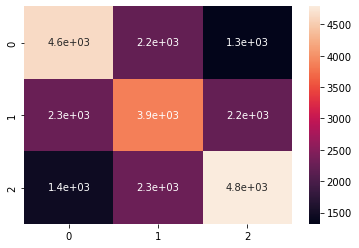

In [41]:
DT_cnf_matrix=confusion_matrix(y_test,DT_pred)
sns.heatmap(DT_cnf_matrix,annot=True)

## Naive Bayes

In [48]:
NV_clf = GaussianNB().fit(x_train.toarray(), y_train)
NV_pred = NV_clf.predict(x_test.toarray())
print(classification_report(y_test, NV_pred))

              precision    recall  f1-score   support

          -1       0.53      0.60      0.56      8159
           0       0.45      0.36      0.40      8337
           1       0.56      0.59      0.57      8504

    accuracy                           0.52     25000
   macro avg       0.51      0.52      0.51     25000
weighted avg       0.51      0.52      0.51     25000



In [58]:
from sklearn.naive_bayes import MultinomialNB
NV_clf = MultinomialNB().fit(x_train, y_train)
NV_pred = NV_clf.predict(x_test)

In [59]:
print(classification_report(y_test, NV_pred))

              precision    recall  f1-score   support

          -1       0.64      0.67      0.66      8159
           0       0.52      0.53      0.53      8337
           1       0.68      0.63      0.66      8504

    accuracy                           0.61     25000
   macro avg       0.61      0.61      0.61     25000
weighted avg       0.61      0.61      0.61     25000



<AxesSubplot:>

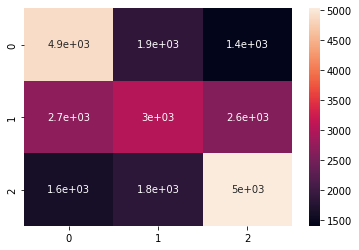

In [49]:
NV_cnf_matrix=confusion_matrix(y_test,NV_pred)
sns.heatmap(NV_cnf_matrix,annot=True)

## Neural Network

In [50]:
NN_clf_stop = MLPClassifier(random_state=33, max_iter=30, hidden_layer_sizes=(16,16), tol=1e-5, early_stopping=True, learning_rate_init=0.01)
NN_clf_stop.fit(x_train, y_train)
NN_pred_stop = NN_clf_stop.predict(x_test)
print(classification_report(y_test, NN_pred_stop))

              precision    recall  f1-score   support

          -1       0.70      0.67      0.68      8159
           0       0.53      0.57      0.55      8337
           1       0.70      0.68      0.69      8504

    accuracy                           0.64     25000
   macro avg       0.64      0.64      0.64     25000
weighted avg       0.64      0.64      0.64     25000



<AxesSubplot:>

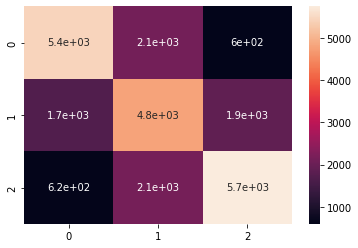

In [51]:
NN_cnf_matrix=confusion_matrix(y_test,NN_pred_stop)
sns.heatmap(NN_cnf_matrix,annot=True)

## SVM

In [52]:
SGD_SVM_clf = make_pipeline(StandardScaler(with_mean=False), SGDClassifier(max_iter=500, tol=1e-3,))
SGD_SVM_clf.fit(x_train, y_train)
SGD_SVM_pred = SGD_SVM_clf.predict(x_test)
print(classification_report(y_test, SGD_SVM_pred))

              precision    recall  f1-score   support

          -1       0.64      0.65      0.65      8159
           0       0.50      0.52      0.51      8337
           1       0.66      0.63      0.64      8504

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000



<AxesSubplot:>

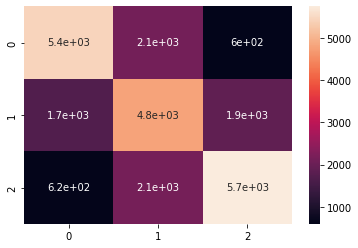

In [53]:
SVM_cnf_matrix=confusion_matrix(y_test,NN_pred_stop)
sns.heatmap(SVM_cnf_matrix,annot=True)

## Logistic Regression

In [56]:
LR_clf = LogisticRegression(max_iter=1000,solver='saga')
LR_clf.fit(x_train,y_train)
LR_pred=LR_clf.predict(x_test)
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

          -1       0.68      0.70      0.69      8159
           0       0.54      0.53      0.53      8337
           1       0.69      0.68      0.68      8504

    accuracy                           0.64     25000
   macro avg       0.64      0.64      0.64     25000
weighted avg       0.64      0.64      0.64     25000



<AxesSubplot:>

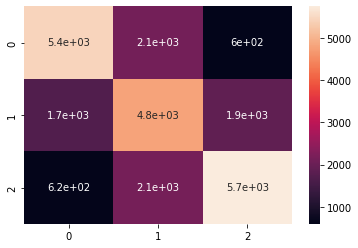

In [57]:
LR_cnf_matrix=confusion_matrix(y_test,NN_pred_stop)
sns.heatmap(LR_cnf_matrix,annot=True)